# Программная работа по оптимизации 1
*Выполнена Боревским Андреем, студентом 193 группы*

---------

## Подготовка

### **Пункт 3**. Формулы градиента и гессиана



> 1. Функционал в классическом представлении:
>
> $$Q(w) = \frac{1}{m}\sum\limits^{n}\ln(1+\exp(-b_i<a_i, w>)) + \frac{\lambda}{2}\|w\|^2_2$$

> 2. Функционал в матрично-векторном виде:
>
>$$Q(w) = (\frac{1}{m})^T_m \cdot \ln( \ (1)_m+\exp(-B_DAw)) + \frac{\lambda}{2}\|w\|^2_2$$
где $B\in\mathbb{R}^m, \ B_D = Diag(B), \ A\in\mathbb{R}^{m\times n}$
>
>$$Q(w) = \frac{1}{m}\|\ln( \ (1)_m+\exp(-B_DAw))\| + \frac{\lambda}{2}\|w\|^2_2$$

> 3. Дифференциал функционала в классическом представлении:
>
>$$d_wQ = -\frac{1}{m}\sum \frac{1}{1+\exp(-b_i<a_i, w>} \cdot \exp(-b_i<a_i, w>) \cdot b_ia_idw + \lambda wdw$$
>
>$$d_wQ = -\frac{1}{m}\sum (\frac{1}{\exp(b_i<a_i, w>} \cdot \frac{\exp(b_i<a_i, w>}{1 + \exp(b_i<a_i, w>}) \cdot b_i<a_i, dw> + \lambda wdw$$
>
>$$\nabla Q = -\frac{1}{m}\sum (1 + \exp(b_i<a_i, w>)^{-1} \cdot a_i^T b_i + \lambda w$$

>4. Дифференциал функционала в матрично-векторном виде:
>
>$$d_wQ = -\frac{1}{m}\cdot(((1)_m+\exp(B_DAw))^{-1}\odot B\odot Adw)  + \lambda wdw$$
>$$\nabla Q = -\frac{1}{m}A^T(((1)_m+\exp(B_DAw))^{-1}\odot B) + \lambda w$$

> 5. Дифференциал второго порядка функционала в классическом представлении
>
> $$d_wQ = \frac{1}{m}\sum (1 +\exp(b_i<a_i, w>)^{-2} \cdot \exp(b_i<a_i, w> \cdot b_ia_idw^2 + \lambda dw^2$$

> 6. Дифференциал второго порядка функционала в матрично-векторном виде:
>
>$$d^2_wQ = \frac{1}{m}((1)_m + \exp(B_DAw))^{-2}\odot\exp(B_DAw)\odot (B\odot Adw) \odot (B\odot Adw)) + \lambda I_n d^2w$$
>
>$$d^2_wQ = \frac{1}{m}A^T\cdot Diag((1)_m + \exp(B_DAw))^{-2}\odot\exp(B_DAw) \odot B^2)Ad^2w + \lambda I_n d^2w$$
>
>$$\nabla^2 Q = \frac{1}{m}A^T\cdot Diag((1)_m + \exp(B_DAw))^{-2}\odot\exp(B_DAw)\odot B^2)A + \lambda I_n$$
>
>$$\nabla^2 Q = \frac{1}{m}A^T\cdot Diag((1)_m + \exp(B_DAw))^{-1} \odot((1)_m - ((1)_m + \exp(B_DAw))^{-1}) \odot B^2)A + \lambda I_n$$


### **Пункт 5**. Проверка реализаций градиента и гессиана


#### 5.1 Подключение необходимых внешних библиотек

In [998]:
from scipy.sparse import diags
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import scipy
import time

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

#### 5.2 Подключение необходимых внутренних библиотек

In [172]:
from optimization import gradient_descent, newton
from oracles import BaseSmoothOracle, QuadraticOracle, LogRegL2Oracle, create_log_reg_oracle, grad_finite_diff, hess_finite_diff
from utils import LineSearchTool, get_line_search_tool
from plot_trajectory_2d.py import plot_trajectory, plot_levels

ModuleNotFoundError: No module named 'optimization'

#### 5.3 Цикл проверки

In [1008]:
A =  np.random.randn(500, 10) # Случайнай матрица А
b =  np.random.randn(500)     # Случайная матрица b

test_oracle = create_log_reg_oracle(A, b, 1) # ЛогРег оракул
delta_grad = []
delta_hess = []
pbar = tqdm(range(20))
for i in pbar: # Проверка на 20 случайных точках
    pbar.set_description("Processing {0}th point".format(i + 1))
    test_x =  np.random.randn(10) # Случайная точка x
    res_grad = grad_finite_diff(test_oracle.func, test_x) # Результат функции аппроксимации градиента
    delta_grad.append(np.mean(np.abs(test_oracle.grad(test_x) - res_grad))) # Вычисление среднего модулей разности
    res_hess = hess_finite_diff(test_oracle.func, test_x).reshape(test_x.shape[0], test_x.shape[0])
    delta_hess.append(np.mean(np.abs(test_oracle.hess(test_x) - res_hess)))  # Вычисление среднего модулей разности
print('Average delta for approximation & self-implemented gradient equals', np.mean(delta_grad))
print('Average delta for approximation & self-implemented hessian equals', np.mean(delta_hess))

  0%|          | 0/20 [00:00<?, ?it/s]

Average delta for approximation & self-implemented gradient equals 7.79385060045712e-08
Average delta for approximation & self-implemented hessian equals 1.0556240440746135e-05


----
## Эксперименты

Для каждого эксперимента необходимо сначала
написать его описание: какие функции оптимизируются, каким образом генерируются данные, какие

методы и с какими параметрами используются. Далее должны быть представлены результаты соответ-
ствующего эксперимента — графики, таблицы и т. д. Наконец, после результатов эксперимента должны

быть написаны Ваши выводы — какая зависимость наблюдается и почему.

### Эксперимент 1. Траектория градиентного спуска на квадратичной функции

----

Дизайн Эксперимента

> Данный эксперимент предполагает анализ траектории `gradient descent` (алгоритм градиентного спуска). В его задачах состоит итеративным образом подобрать некоторый $\hat{x}$, такой где функцинал будет достигать своего минимума. Реализация метода осуществлена в файле **optimization.py**. Вся работа осуществляется на основе оракула квадратичных функций. Несмотря на долгий процесс подбора наиболее оптимальных двумерных квадратичных функций, в итоговой версии представлены только две: `data_round` и `data_extended`, призванные указать на различия траекторий в разных кейсах. Цель анализа состоит в рассмотрении влияния сразу нескольких гиперпараметров: `condition number` (значение обусловленности), `St. point` (позиция начальной точки) и стратегии выбора шага.


> Также стоит уделить внимание факторам влияния.
> 1. Значение обусловленность - мера изменчивости выхода функции от незначительных колебаний входных значений. Приводится в легенде на графиках под названием 'Condition N'. Вычисляется для каждй функции в каждой точке по стандартной формуле:
> $$\mathcal{k} = \frac{\|\nabla f(x)\|}{\|f(x)\|}\|x\|$$
> 2. Подходящие позиции начальных точек рассматривались с точки зрения иллюстрации кардинально разных областей графика, из которых начинает работать алгоритм градиентного спуска. Среди определенного множества исследованных точек. в итоговые графики были добавлены две: $x_1 = (-4, -5)$ и $x_1 = (4, 5)$ . 
> 3. В рамках проводимых экспериментов существует только три доступные стратегии выбора шага: Армихо, Вульф и константный. Каждый из них осуществлен и представлен на графиках всех функций на всех начальных точках. Таким образом, становится возможным понять разницу каждого из подхода и их эффнективность. В качестве дополнительных материалов так же приводится отдельные графики по каждому кейсу (стратегия и функция) для повышения детализации и повышения состоятельности анализа. В качестве константы для третьего метода использовалась одна сотая, однако в доп. материалах приведены случаи для одной десятой. Для Армихо и Вульфа использовались дефолтные гиперпараметры:
``` python
   if self._method == 'Wolfe':
            self.c1 = kwargs.get('c1', 1e-4)
            self.c2 = kwargs.get('c2', 0.9)
            self.alpha_0 = kwargs.get('alpha_0', 1.0)
   elif self._method == 'Armijo':
            self.c1 = kwargs.get('c1', 1e-4)
            self.alpha_0 = kwargs.get('alpha_0', 1.0)
```

----

Результаты Эксперимента


#### 1.1 Создание матриц

In [1010]:
data_round = [np.asarray([[16, 2], [2, 5]]), np.asarray([3, 7])] # Матрицы A и b для первого графика
data_extended = [np.asarray([[2, 0], [0, 17]]), np.asarray([1, 3])] # Матрицы A и b для второго графика
x_0 = np.array([4.0, -5.]) # Начальная точка 1
x_1 = np.array([-4., -5.]) # Начальная точка 2
x_2 = np.array([4., 5.])   # Начальная точка 3
x_axis = [x_1, x_2]

#### 1.2 Построение общих графиков

In [ ]:
data_round = [np.asarray([[10, 2], [2, 5]]), np.asarray([3, 7])]
data_extended = [np.asarray([[2, 0], [0, 17]]), np.asarray([1, 3])]

In [ ]:
colors = [['red', 'darkgreen', 'navy'], ['lightcoral', 'limegreen', 'royalblue'], ['gold', 'lime', 'cyan']]
plt.rcParams["figure.figsize"] = (20,20)

x_0 = np.array([4.0, -5.])
x_1 = np.array([-4., -5.])
x_2 = np.array([4., 5.])
x_axis = [x_0, x_1, x_2]
for data in [data_round, data_extended]:
    plot_oracle = QuadraticOracle(data[0], data[1])
    for i, point in enumerate(x_axis[1:3]):
        cond = np.round(np.linalg.norm(plot_oracle.grad(point)) / np.linalg.norm(plot_oracle.func(point)) * \
            np.linalg.norm(point), 2)
        plot_levels(plot_oracle.func, xrange=[-5, 5], yrange=[-5, 7], levels=[0, 0.25, 1, 4, 9, 16, 25, 50])
        [x_star, msg, history] = gradient_descent(plot_oracle, point, trace=True, 
                                              line_search_options=LineSearchTool(method='Constant', c=0.01))
        plot_trajectory(plot_oracle.func, history['x'],  
                        label='Constant, St. point: {0}, Condition N: {1}'.format(point, cond), color=colors[i][2])

        [x_star, msg, history] = gradient_descent(plot_oracle, point, trace=True, 
                                              line_search_options=LineSearchTool(method='Armijo'))
        plot_trajectory(plot_oracle.func, history['x'],  
                        label='Armijo, St. point: {0}, Condition N: {1}'.format(point, cond), color=colors[i][1])
        
        [x_star, msg, history] = gradient_descent(plot_oracle, point, trace=True)
        plot_trajectory(plot_oracle.func, history['x'], 
                        label='Wolfe, St. point: {0}, Condition N: {1}'.format(point, cond), color=colors[i][0])

    plt.legend()
    plt.grid(True)
    plt.show()

#### 1.3 Построение дополнительных графиков

In [ ]:
data_fluct = [np.array([[18, -10], [-10, 6]]),  np.array([12, -7])]
x_0 = np.array([3.0, -5.])
x_1 = np.array([-3., -5.])
x_2 = np.array([3., 5.])
x_axis = [x_1, x_2, x_0]

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_oracle = QuadraticOracle(data_round[0], data_round[1])
for i, point in enumerate(x_axis):
    cond = np.round(np.linalg.norm(plot_oracle.grad(point)) / np.linalg.norm(plot_oracle.func(point)) * \
            np.linalg.norm(point), 2)
    plot_levels(plot_oracle.func, xrange=[-3, 3], yrange=[-5, 7], levels=[0, 0.25, 1, 4, 9, 16, 25, 50])
    [x_star, msg, history] = gradient_descent(plot_oracle, point, trace=True, 
                                              line_search_options=LineSearchTool(method='Constant', c=0.1))
    plot_trajectory(plot_oracle.func, history['x'],  
                        label='Constant, St. point: {0}, Condition N: {1}'.format(point, cond), color=colors[i][2])

plt.legend()
plt.grid(True)
plt.show() 

plot_oracle = QuadraticOracle(data_fluct[0], data_fluct[1])   
for i, point in enumerate(x_axis):
    cond = np.round(np.linalg.norm(plot_oracle.grad(point)) / np.linalg.norm(plot_oracle.func(point)) * \
            np.linalg.norm(point), 2)
    plot_levels(plot_oracle.func, xrange=[-3, 3], yrange=[-5, 7], levels=[0, 0.25, 1, 4, 9, 16, 25, 50])
    [x_star, msg, history] = gradient_descent(plot_oracle, point, trace=True, 
                                              line_search_options=LineSearchTool(method='Armijo'))
    plot_trajectory(plot_oracle.func, history['x'],  
                        label='Armijo, St. point: {0}, Condition N: {1}'.format(point, cond), color=colors[i][1])

plt.legend()
plt.grid(True)
plt.show()    
    
for i, point in enumerate(x_axis):
    cond = np.round(np.linalg.norm(plot_oracle.grad(point)) / np.linalg.norm(plot_oracle.func(point)) * \
            np.linalg.norm(point), 2)
    plot_levels(plot_oracle.func, xrange=[-3, 3], yrange=[-5, 7], levels=[0, 0.25, 1, 4, 9, 16, 25, 50])
    [x_star, msg, history] = gradient_descent(plot_oracle, point, trace=True)
    plot_trajectory(plot_oracle.func, history['x'], 
                        label='Wolfe, St. point: {0}, Condition N: {1}'.format(point, cond), color=colors[i][0])

plt.legend()
plt.grid(True)
plt.show()

#### 1.4 Графики

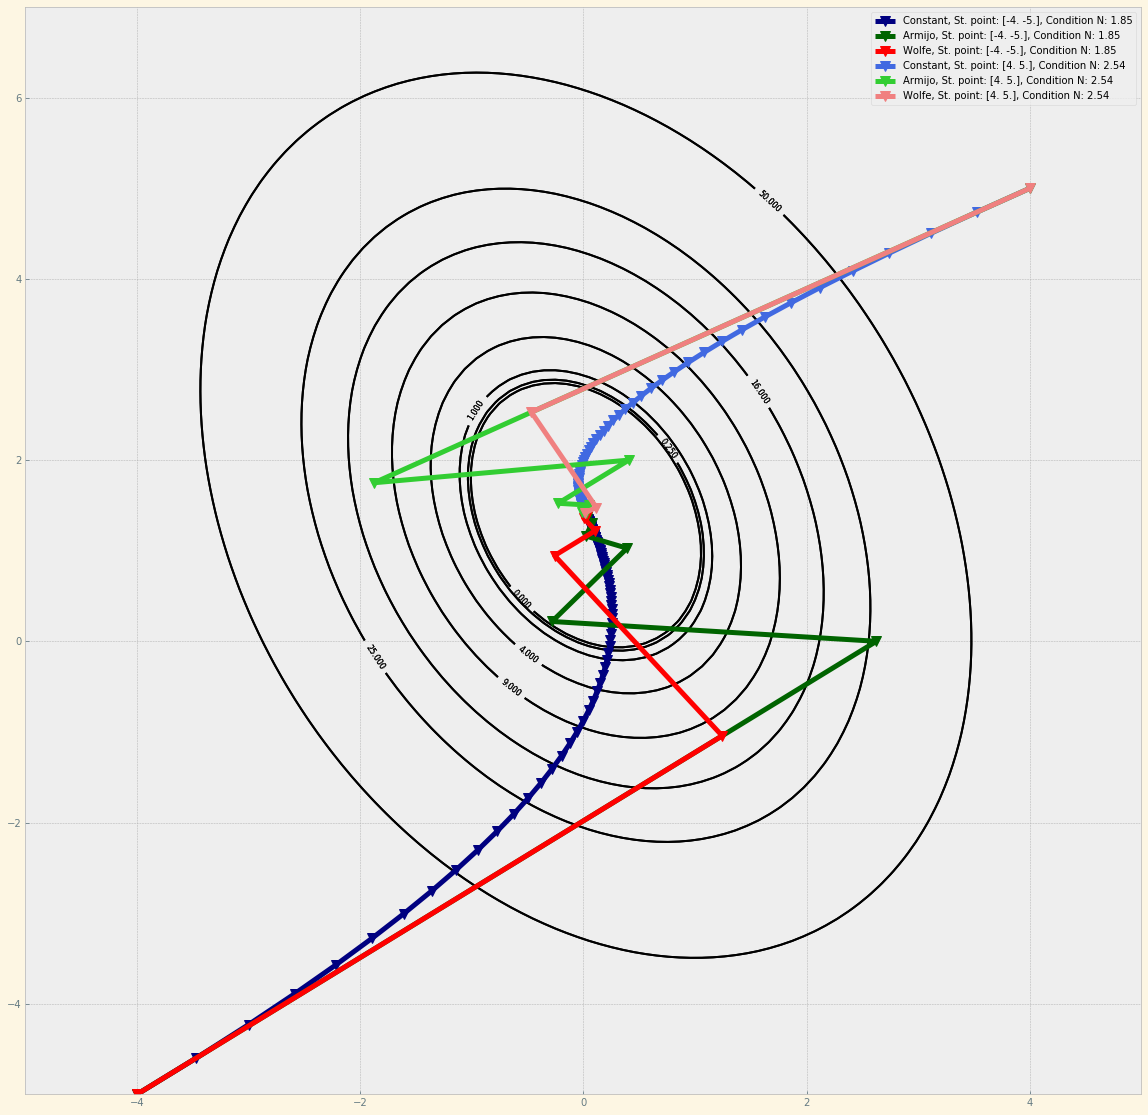
*Graph 1.1.Round function*

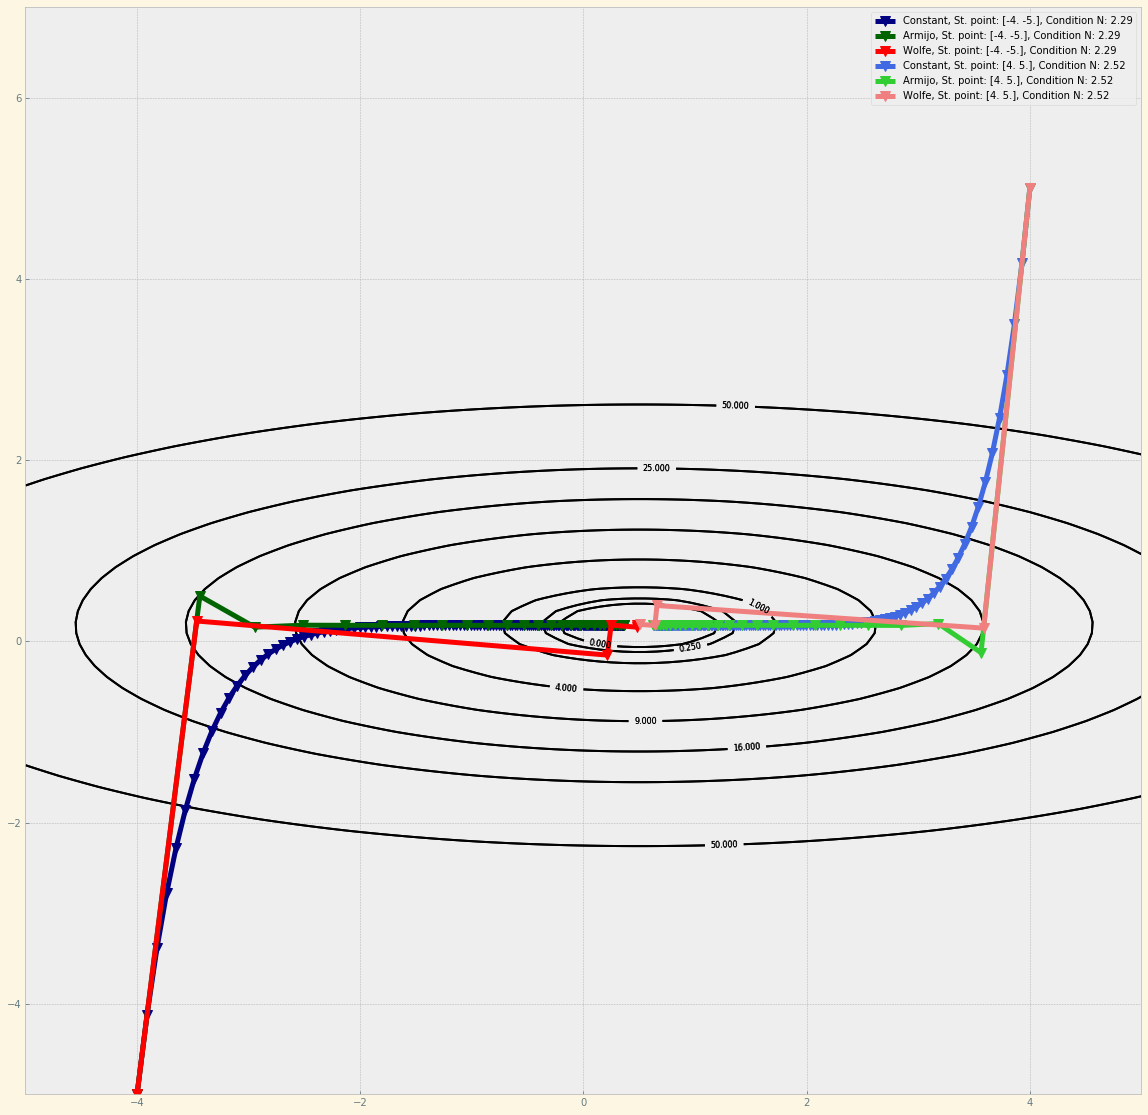
*Graph 1.2.Extended function*

----

Выводы

*Ключевой вопрос: Как отличается поведение метода в зависимости от
числа обусловленности функции, выбора начальной точки и стратегии выбора шага?*

1. Влияние выбора стратегии подбора шага

Один из ключевых гиперпараметров нашего эксперимента. Согласно графикам, можно увидеть кардинальную разницу траектории. Наибольшее число шагов осуществляет константный: крайней маленькие шаги, постепенно приводящие к схождению итеративного метода. Если выбрать в качестве константы десятую вместо сотой, то возможно увидеть движения метода (доп. материалы 1.A). Значения, близкие к единице, не подходят. Таким образом, константный можно смело называть наименее эффективным по скорости схождения среди всех представленных. С другой стороны, он и самый просто в реализации.

Напротив, наиболее успешен метод Вульфа: графики 1.1 и 1.2 явно показывают, что даже в самых сложных для градиентного спуска функциях, когда линии уровня растянуты, метод Вульфа делает четко выраженные шаги по направлению к оптимуму, демонстрируя наименее колебательный характер. При прочих равных, Вульф либо демонстрирует наилучшее качество, либо одно из лучших. Однако нельзя не заметить, что случаются кейсы, когда крайне значительные шаги метода заставляют его "перепрыгивать" и после возвращаться обратно.

Последний из методов - Армихо. Он представляет из себя визуально нечто среднее между Вульфом и константным (1.1 и 1.2). В отличии от последнего, Армихо подвержен влиянию внешних параметров: характер функции, обусловленность, начальная точка. Таким образом, в зависимости от условий Армихо может как подталкивать градиентный спуск к эффективности, аналогичной методу Вульфа, так и превращать метод в аналгичный константному, осуществляя колоссальное число колебаний траектории.

2. Влияние начальной точки

Начальная точка имеет особое воздействие на значение обусловленности, о котором позже. Тем не менее, из основных графиков можно сделать вывод, что несмотря на наличие / отсутсвие симметри в первых шагах алгоритма, общий характер траектории схож при прочих равных для всех случаев (1.1 и 1.2).

3. Влияние значения обусловленности

Итак, на основных графиках данное значение особо не колеблется, с максимальной дельтой не сильно превышающей единицу в зависимости от конфигурации. В таких кейсах особой разницы не увидишь и возникнет ощущение, что данная метрика не позволяет сказать что-либо о функции. Однако, если обратить внимание на доп. графики 1.B и 1.C, где данные значения кардинально сильней разнятся, можно отметить, что большая обусловленность свидетельствует о большей колебательности процесса и влияет негативно на скорость сходимости. Даже метод Вульфа теряет свою эффективность (1.C). Дополнительная теория: [Lecture 3](https://sites.cs.ucsb.edu/~yuxiangw/classes/CS292A-2019Spring/Lectures/Lecture3.pdf)

---

Дополнительные материалы

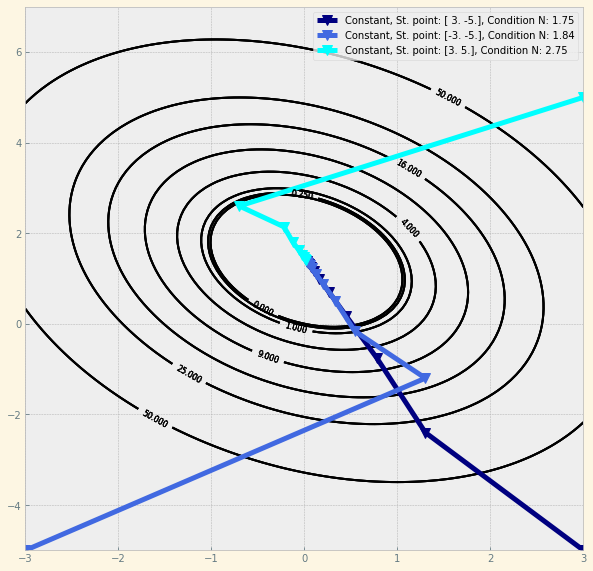
*Graph Additional 1.A Constant with c = 0.1*

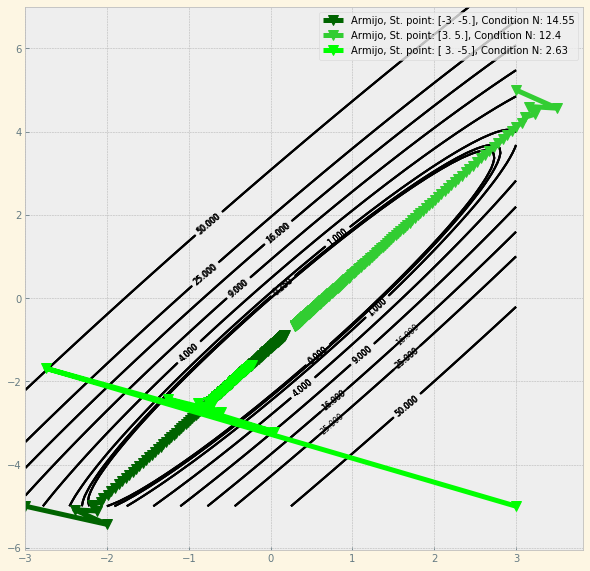
*Graph Additional 1.B Armijo with high $\triangle \mathcal{k}$*

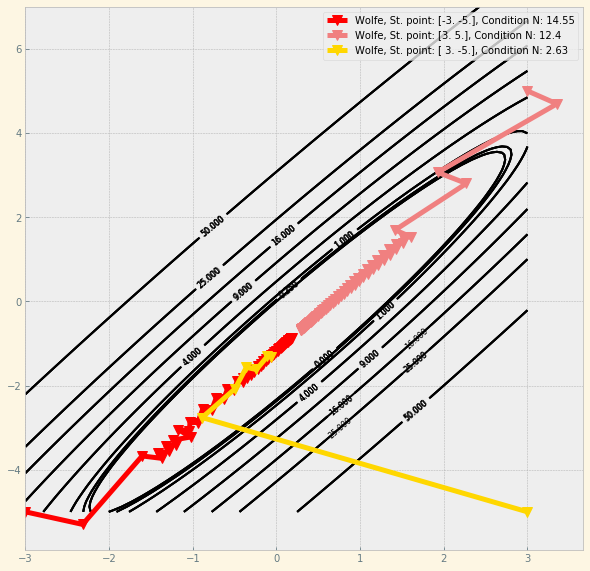
*Graph Additional 1.C Wolfe with high $\triangle \mathcal{k}$*

----

### Эксперимент 2. Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

---

Дизайн эксперимента

> Весь эксперимент во многом аналогичен предыдущему в вопросах, касающихся теоритической подоплеки. Используется аналогичные квадратичные функции, правда уже порядка n. В нашей задаче присутсвуют 6 семейств функции, диверсифицирующихся по значения n: от 10 до $10^6$. Таким образом, становится возможным понять зависимость числа итераций от и размерности n (через сравнение семейств функций), и самго $\mathcal{k}$. Напомним, что последнее является значением обусловленности, вычисляющегося по аналогичной предыдущему заданию формуле.

> Таким образом, итерируясь по семействам кривых, мы три раза проводим эксперимент: создаем диагональную разреженную матрицу размера $n \times n$, где элементы диагонали лежат в интервале от 1 до $\mathcal{k}$, обязательно включая границы. Далее случайным образом задаются векторы $x$ и $b$, после чего осуществляется градиентный спуск. Отметим, что фиксируемое значение `max_iter` равняется ста.

> Подчеркнем, что во всех структурах (оракул и GD) используются дефолтные параметры, помимо `trace`.

----

Результаты Эксперимента

#### 2.1 Вычисления для графиков

In [ ]:
n_values = [10, 100, 1000, 10000, 100000, 1000000] # семейства функций
iters = [[], [], [], [], [], []]  # список значений для графиков
for repeat in range(3):  # три повтора эксперимента
    for i, n in enumerate(tqdm(n_values)): # итерация по семействам
        tmp_iters = []
        for k in range(2, 50, 2): # итерация п значениям обусловленности
            point = np.random.randint(1, 20, (n)) # инициализация x
            diagonal = np.random.randint(1, k, (n))
            diagonal[0] = 1
            diagonal[np.random.choice(n)] = k
            A = diags(diagonal) # создание разреженной матрицы А
            b = 2 * np.random.randint(1, 20, (n)) + 2
            iter_oracle = QuadraticOracle(A, b)
            [x_star, msg, history] = gradient_descent(iter_oracle, point, trace=True, max_iter=100) # GD
            if msg == 'success':
                tmp_iters.append(len(history['time']))
        iters[i].append(tmp_iters)

#### 2.2  Создание основного графика

In [ ]:
plt.style.use('bmh')
fig = plt.figure(1, figsize=(18,9))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'navy']
for j, n in enumerate(n_values):
    for i in range(len(iters[0])):
        fam, = plt.plot(range(2, 50, 2), iters[j][i], color=colors[j])
    fam.set_label('10e{}'.format(j + 1))
plt.legend(title='Values of n', fontsize='large')
plt.xlabel('Value of condition number')
plt.ylabel('Number of iterations')
plt.grid(True)
plt.show()

#### 2.3 Создание серии дополнительных графиков

In [ ]:
fig = plt.figure(1, figsize=(18,9))
for j, n in enumerate(n_values):
    ax = fig.add_subplot(2,3, j+1)
    for i in range(len(iters[0])):
        ax.plot(range(2, 50, 2), iters[j][i])
plt.show()

#### 2.4 Графики

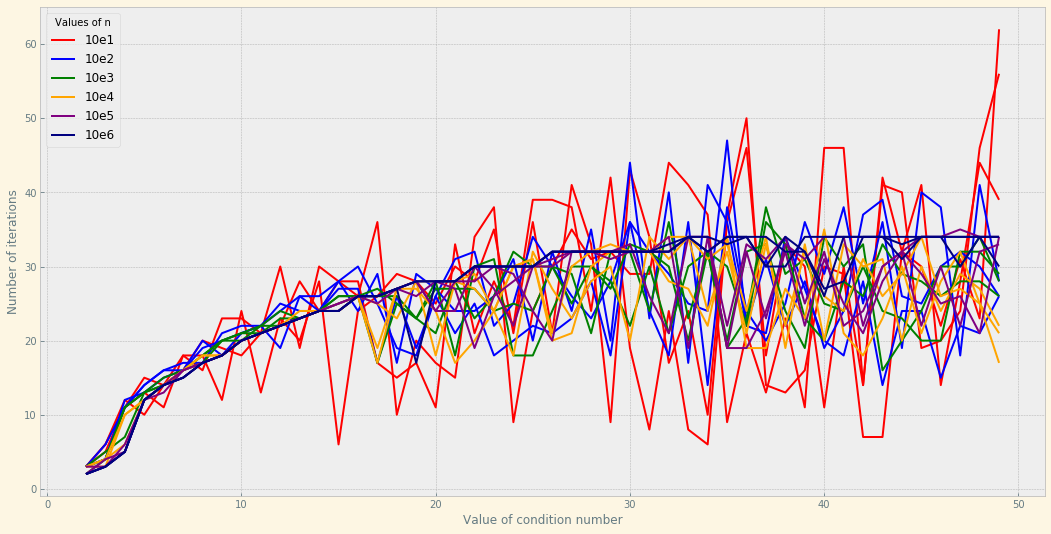
*Graph 2.1 All families together with step = 1*

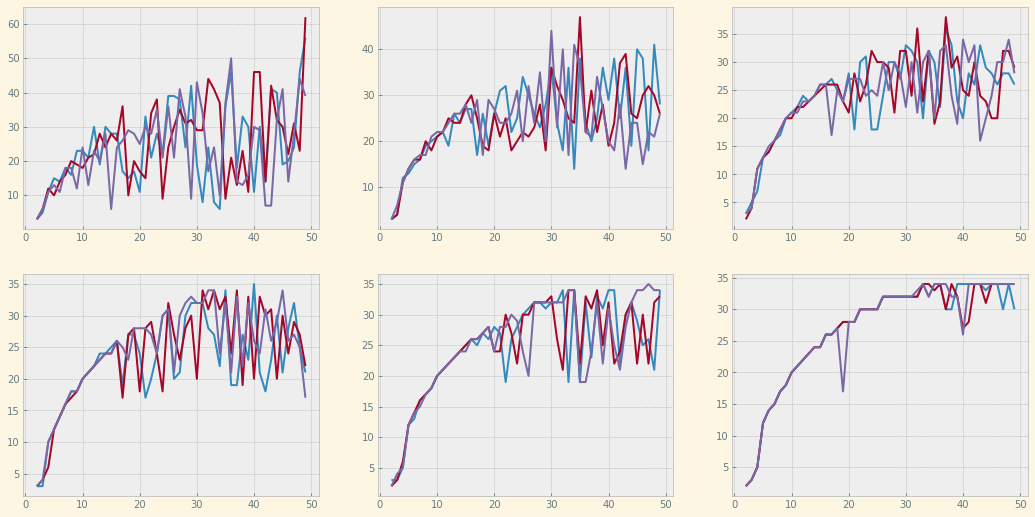
*Graph 2.2 All families separated with step = 1*

---

Выводы

*Ключевой вопрос: Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле-
дующих двух параметров: 1) числа обусловленности κ ≥ 1 оптимизируемой функции и 2) размерности пространства n оптимизируемых переменных.*

1. Число обусловленности

Как можно увидеть из результатов эксперимента, число обусловленности напрямую коррелирует с числом итераций. По мере увеличения $\mathcal{k}$, растет и число итераций вне зависимости от анализируемого семейства (напоминает $l\ln n$). Однако, в то же время нельзя не отметить, что даже при рассмотрении графиков отдельно по семейства (2.2), флюктуации хотя и не мешают разглядеть общий характер, иногда указывают на низкое число итераций даже при выосоком значения обусловленности. К счастью, тут нас спасает следующий гиперпараметр, а пока укажем, что в доп. материалах есть графики с шагом 2, которые менее колебательны и все равно подтверждают описанную природу корреляции.

2. Размерность пространства


Благо у нас есть два анализируемых фактора, и вопросы, на которые нам не способен ответить первый пункт, отвечает второй. Итак, при малой размерности мы получим достаточно сильно отличабщиеся друг от друга кривые, имеющие тем не менее схожий характер роста. Особенно это заметно для первого семейства. Однако по мере увеличения гиперпараметра $n$, кривые становятся все более сходими, разброс уменьшается и более четко предстает истинная картина, особенно понятно запечетленная для наибольшего семейства. Мы видим на последующий графиках ярко выраженный рост числа итераций по мере увеличения числа обусловленности. За редким исключением отдельные кривые сигнализируют падение числа итераций, что оправдывается случайным подбором значений в каждом отдельном эксперименте.

----

Дополнительные материалы

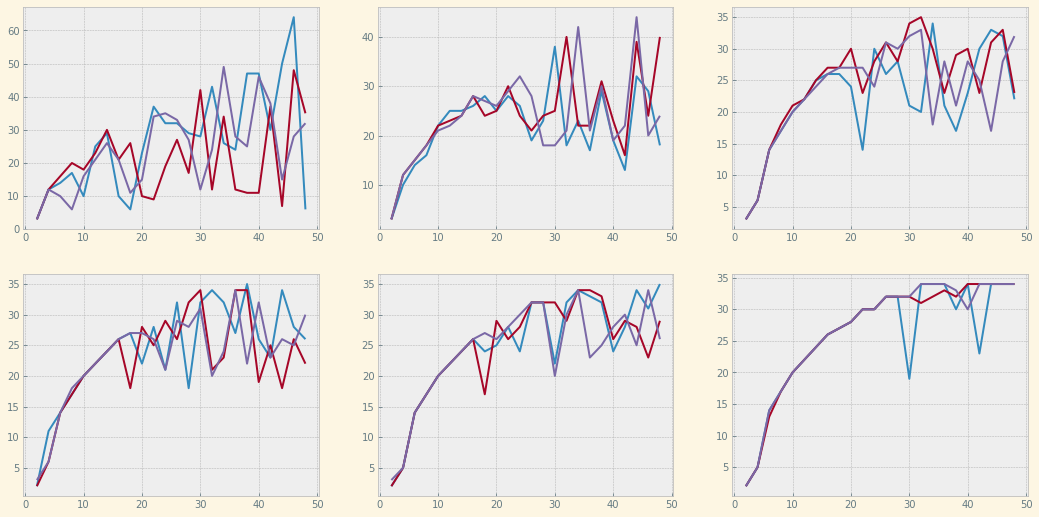
*Graph 2.A All families separated with step = 2*

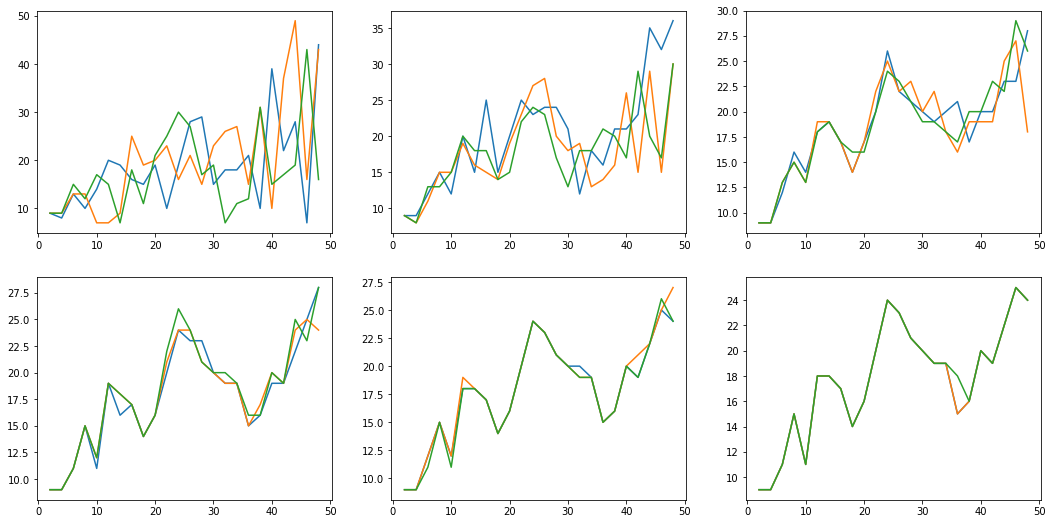
*Graph 2.B All families separated with Armijo approach*

----

### Эксперимент 3. Какая точность оптимизации нужна в реальных задачах для метода Ньютона?

---

Дизайн эксперимента

> Эксперимент заключается в использовании итеративного метода Ньютона с меняющейся от теста к тесту значением `tolerance` (требуемая точность). Диапазон изменений гиперпараметра: от 10e-8 до 1. Берется 40 значений по логарифмической сетке. Весь тест проходит на трех реальных датасетах по бинарной классификации, отличающихся объемами.

> Сначала выбранные датасеты проходят необходимую предобработку, подстраиваются под задачит нашего эксперимента. После последовательно каждый датасет в качестве матриц $A$ и $b$ отвправляются в логистический оракул нашей реализации. После запускается метод Ньютона с начальной точкой $x_0 = 0$ и заданным значением $\epsilon$. 

> Определенная хитрость заключается в пост-процессинге нашего эксперимента. Полученные результаты необходимо правильно обработать для итоговых выводов. При успешном выходе нашего метода, мы делаем следующие вычисления:

>$$\frac{\sum sign(y_{test} * \hat{b})} / m$$
где $\hat{b} = X_{test} *\hat{x}$

-----

Результаты эксперимента

#### 3.1 Формирование доступа к датасетами

In [ ]:
data_survive = pd.read_csv('haberman.data')
data_cancer = pd.read_csv('breast-cancer-wisconsin.data',  sep=',', header=0)
bank = pd.read_csv('bank-additional/bank-additional.csv', sep=';')

tmp = data_cancer.iloc[:, -1].map({2 : 1, 4 : -1})
data_cancer['target'] = tmp
data_cancer = data_cancer.iloc[:, 1:]

tmp = bank.iloc[:, -1].map({'yes' : 1, 'no' : -1})
bank['target'] = tmp

tmp = data_survive.iloc[:, -1].map({2 : -1, 1 : 1})
data_survive['target'] = tmp

#### 3.2 Обработка датасетов

In [ ]:
le = OrdinalEncoder()
bank[bank.select_dtypes([object]).columns] = le.fit_transform(bank[bank.select_dtypes([object]).columns])

le = OrdinalEncoder()
data_cancer[data_cancer.select_dtypes([object]).columns] = \
                    le.fit_transform(data_cancer[data_cancer.select_dtypes([object]).columns])

#### 3.3 Вычисление среднего процента ошибки

In [ ]:
per_error = []
for dataset in [bank, data_cancer, data_survive]:
    X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:, 0:-2], dataset.iloc[:, -1], test_size=0.4, random_state=777, stratify=dataset.iloc[:, -1])
    tmp_error = []
    for eps in tqdm(np.logspace(-8, 0, num=40)):
        point = np.zeros(X_train.shape[1])
        tolerant_oracle = create_log_reg_oracle(X_train.to_numpy(), y_train.to_numpy(), regcoef = 1 / X_train.shape[0])
        [x_star, msg, history] = newton(tolerant_oracle, point, tolerance=eps, max_iter=50)
        if msg == 'success':
            b_star = X_test.to_numpy() @ x_star
            error_rate = np.sum(np.sign(y_test.to_numpy() * b_star) == -1) / y_test.shape[0]
        tmp_error.append(error_rate)
    per_error.append(tmp_error)

#### 3.4 Построение графиков

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig = plt.figure(1, figsize=(20, 8))
for i in range(3):
    ax = fig.add_subplot(1,3, i+1)
    ax.scatter(np.log(np.logspace(-8, 0, endpoint=True, num=40)), per_error[i])
    ax.set(title='Dataset {0}'.format(i+1), xlabel='tolerance', ylabel='error rate')
plt.show()

#### 3.5 Графики

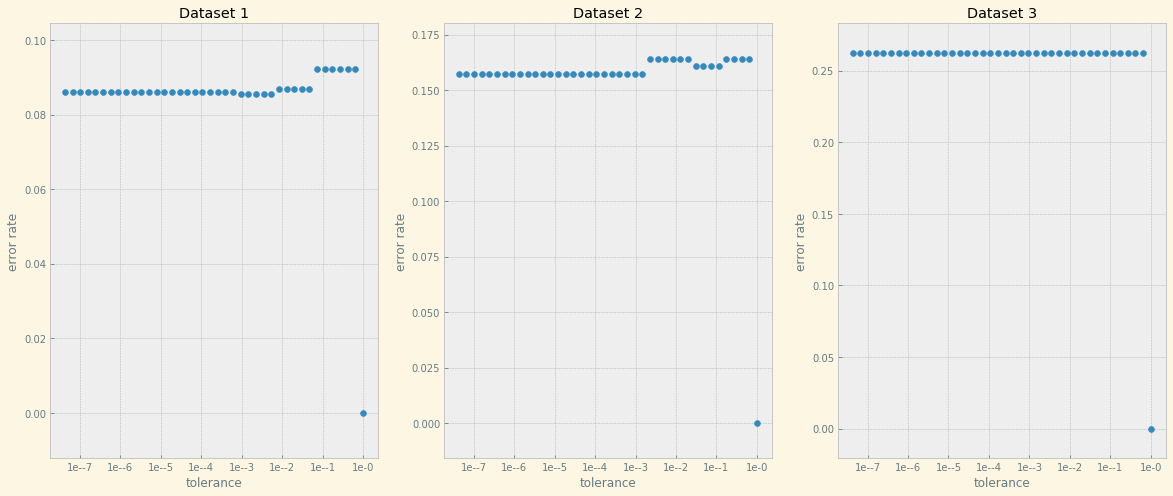
*Graph 3.1 a) Results for bank dataset b) Results for cancer dataset c) Results for survive dataset*

-------

Выводы

*Ключевой вопрос: как влияет точность оптимизации целевой функции на итоговое качество решения самой задачи?*

1. На представленных трех графиках, каждый отвечающий за свой отдельный датасет, мы видим три разных характера поведения. Тем не менее, мы видим на каждом из них приблизительно схожую динамику: среднее значение, рост, падение. Исключением является лишь третий график, который дает приблизительно схожие значение ввиду своей малоразмерности. 


2. Нельзя не заметить, что итерации значений `tolerance` имеют воздействие для больших датасетов. Однако, хоть характер данных изменений и постоянен, они достаточно невелики (дельта за исключением последней позиции составляет меньше двух процентных пунктов).


3. После экспериментов на других массивах стало очевидно, что характер данных изменений действительно уникален для каждого датасета. Однако, прежним остается и утверждение, что изменения, будучи хоть и заметными, не велики.


4. По поводу влияния стоит сказать, что постепенное увеличение точности ухудшает качество с приблизительно $\epsilon = 10^{-3}$. Вплоть до единицы оно увеличивается или достигает некоторого пика, после чего падает.


5. Также заметим, что значение ноль в единице, конечно, не относится к реальной жизни, а является лишь рабочим моментом кода. На самом деле, получая на выходе нулевую матрицу (равную $x_0$), мы при перемножении ее на другие и подставлении в представленную выше формулу получаем 0 в качестве error rate. На самом деле, ошибка равняется 100%, но никакого смысла для наших графиков не несет.

-----

### Эксперимент 4. Сравнение методов на реальной задаче логистической регрессии

----

Дизайн эксперимента

> Название эксперимента говорит само за себя: мы будем сравнивать два метода на логистической регрессии. Точней, в сравнении будут участвовать метод Ньютона и Градиентный спуск. Их концепция подробно разбирается в приводимой в задании теории, а их реализации не раз упоминались в данном отчете. 

> Сравнение будет проходить по трем дисциплинам, отображенных в графиках: а) Зависимость значения функции против номера итерации метода б)Зависимость значения функции против реального времени работы и в) Зависимость относительного квадрата нормы градиента против реального времени работы.

> Планируется работать на пяти датасетах, приведенных в задании. Отдельно будет содержаться блок с хранением и декодингом датасетов, их обработке для дальнейшей работы в рамках построенной архитектуры.

-----

Результаты эксперимента

#### 4.1 Синхронизация с `libsvm`

In [ ]:
from libsvm.svmutil import *

paths = ['real-sim', 'rcv1_train.binary', 'news20.binary',
         ['w8a.train','w8a.test'], ['gisette_test.data','gisette_train.data']]

#### 4.2 Создание графиков на основе `libsvm` данных

In [ ]:
from sklearn.datasets import load_svmlight_file

for dataset in tqdm(paths):
    fig, ax = plt.subplots(1, 3)
    if isinstance(dataset, str):
        X_train, y_train = load_svmlight_file(dataset)
    else:
        X_train, y_train = load_svmlight_file(dataset[0])
    point = np.zeros(X_train.shape[1])
    comp_oracle = create_log_reg_oracle(X_train, y_train, regcoef = 1 / y_train.shape[0])
    for method in tqdm([gradient_descent]):
        [x_star_n, msg_n, history_n] = method(comp_oracle, point, trace=True)
        ax[0].plot(np.arange(0, len(history_n['func'])), history_n['func'], label="Method: {}".format(method))
        ax[1].plot(history_n['time'], history_n['func'], label="Method: {}".format(method))
        zero = np.power(history_n['grad'][0], 2)
        ax[2].plot(history_n['time'], np.power(history_n['grad'], 2) / zero, label="Method: {}".format(method))
    ax[0].set(title='Function value to iterations graph for {0}'.format(dataset),
              ylabel='Function value', xlabel='Iterations')
    ax[1].set(title='Function value to real time graph for {0}'.format(dataset),
              ylabel='Function value', xlabel='Real time')
    ax[2].set(title='Gradient norm square value to real time graph for {0}'.format(dataset),
              ylabel='Gradient norm square', xlabel='Real time', yscale='log')
    plt.show()

#### 4.3 Создание графиков на основе собственных данных

In [ ]:
dts = ['cancer', 'survive', 'bank']
mth = ['GD', 'newton']
plt.rcParams['font.size'] = 15
for i, dataset in enumerate(tqdm([data_cancer, data_survive, bank])):
    X = dataset.iloc[:, 0:-2]
    y = dataset.iloc[:, -1]
    X = X.to_numpy()
    y = y.to_numpy()
    point = np.zeros(X.shape[1])
    comp_oracle = create_log_reg_oracle(X, y, regcoef = 1 / y.shape[0])
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 12))
    for i, method in enumerate([gradient_descent, newton]):
        [x_star_n, msg_n, history_n] = method(comp_oracle, point, trace=True)
        ax[0].plot(np.arange(0, len(history_n['func'])), history_n['func'], label="Method: {}".format(mth[i]))
        ax[1].plot(history_n['time'], history_n['func'], label="Method: {}".format(mth[i]))
        zero = np.power(history_n['grad_norm'][0], 2)
        ax[2].plot(history_n['time'], np.power(history_n['grad_norm'], 2) / zero, label="Method: {}".format(mth[i]))
    ax[0].set(title='Function value to iterations graph for {0}'.format(dts[i]),
              ylabel='Function value', xlabel='Iterations')
    ax[0].legend(fontsize='large', loc='upper right')
    ax[1].set(title='Function value to real time graph for {0}'.format(dts[i]),
              ylabel='Function value', xlabel='Real time')
    ax[1].legend(fontsize='large', loc='upper right')
    ax[2].set(title='Gradient norm square value to real time graph for {0}'.format(dts[i]),
              ylabel='Gradient norm square', xlabel='Real time', yscale='log')
    ax[2].legend(fontsize='large', loc='upper right')
    plt.show()

#### 4.4 Графики

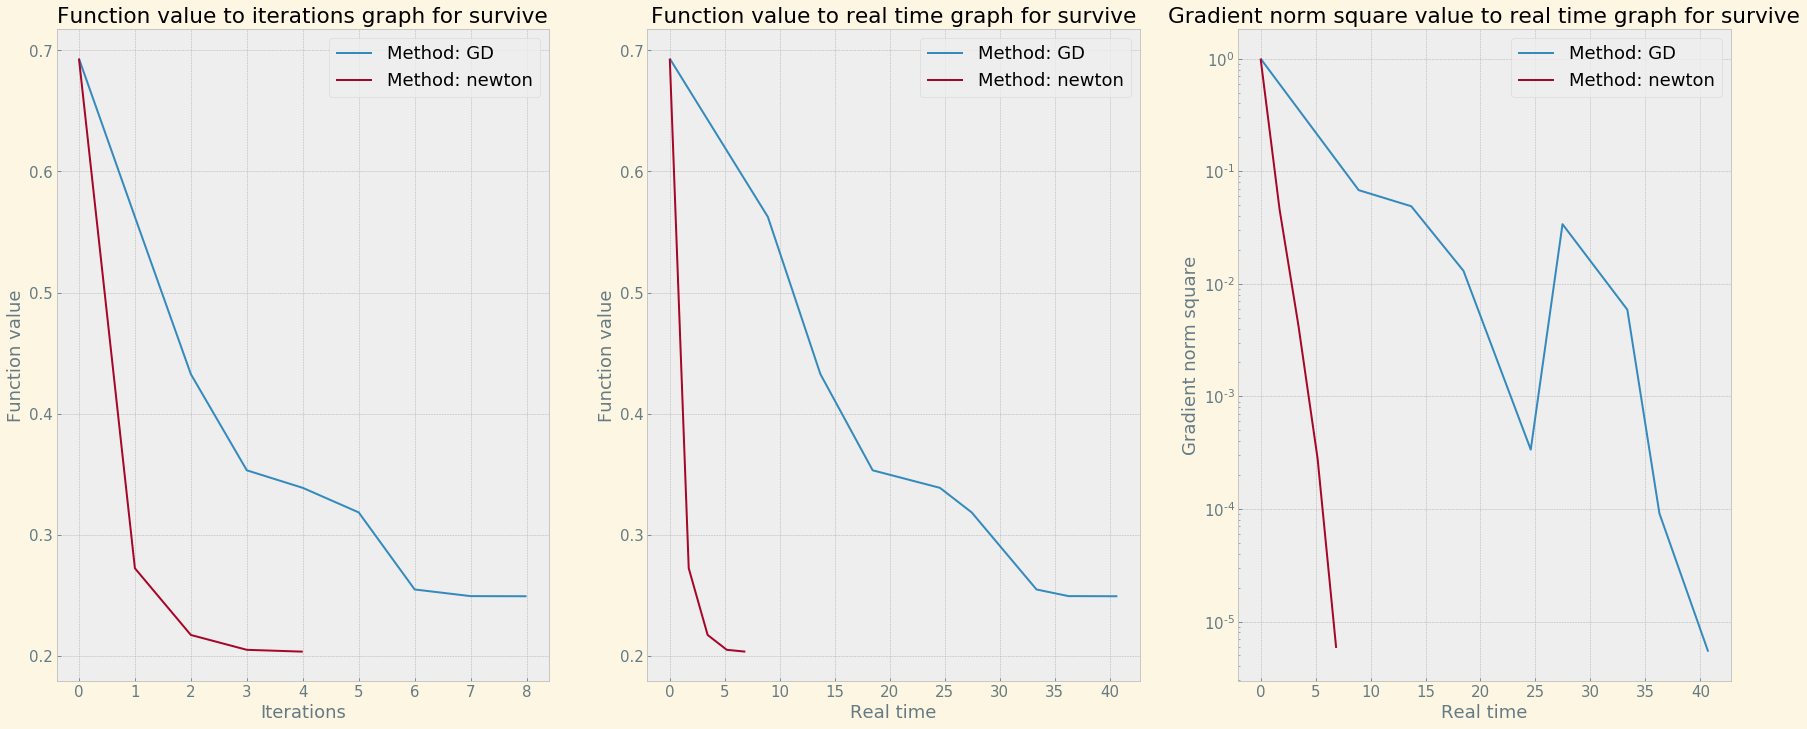
*Graph 4.1 Bank dataset*

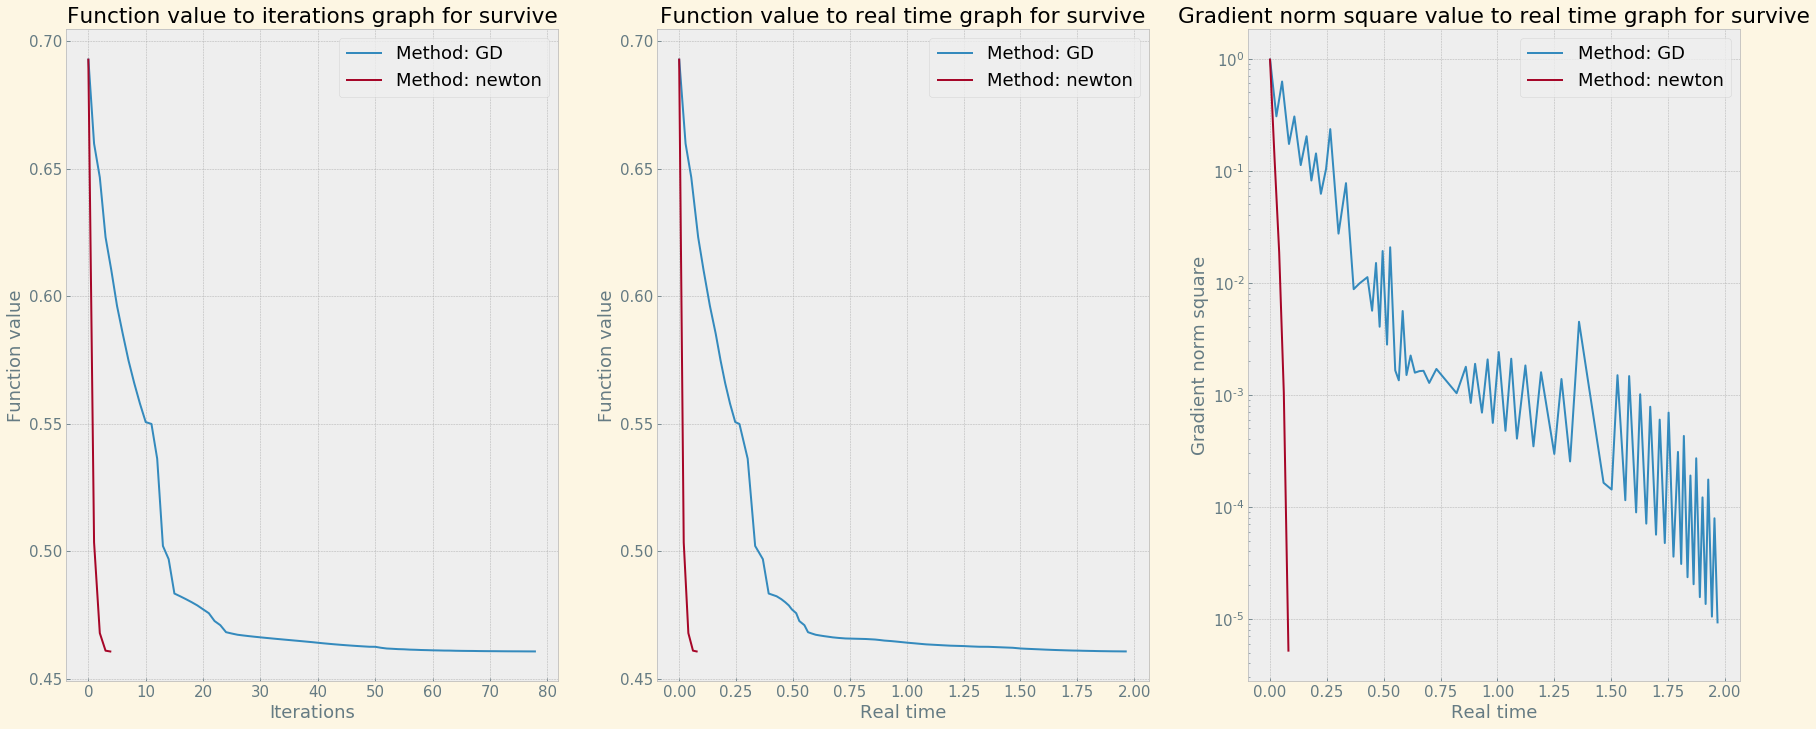
*Graph 4.2 Cancer dataset*

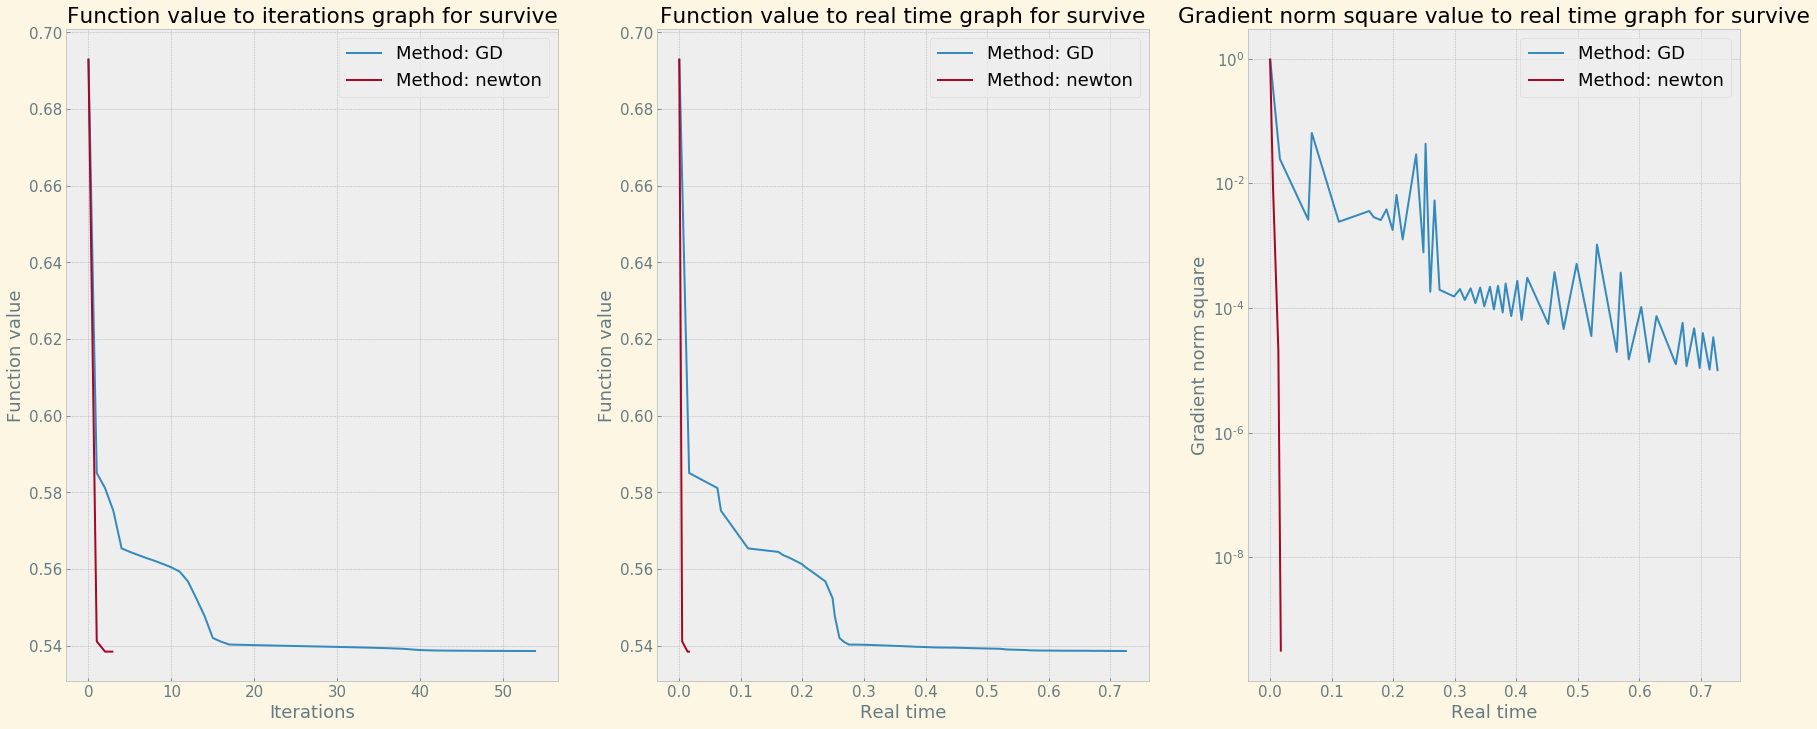
*Graph 4.3 Survive dataset*

----

Выводы

*Какой из методов лучше и в каких ситуациях?*

1. Из экспериментов над предоставленными данными из libsvm мы четко уяснили, что работа с большими разреженными матрицами не представляется возможной ввиду вычислительных ограничений имеющийся техники. Другими словами, оба метда работают крайне долго в своих вычислениях, показываю свою неэффективность в особенности с последними датасетами из списка. Таким образом, желаемые характеристики сравнения относительно времени указывают на плохие показатели для обоих методик.


2. Однако в целях продолжения эксперимента, было принято решение не останавливаться на неудачных попытках (и на локальном устройстве, и в гугл колаб). Был приведен аналогичный заявленному эксперимент, но уже на собственныз данных.


3. Результаты, как мы можем видеть, однозначные. Метод Ньютона показывает намного более качественные результаты, чем градиентный спуск по всем направлениям: и по значению функции относительно итерации и времени, и по норме градиента, и по числу итераций для сходимости. В одном же из кейсов градиентный спуск вообще начал демонстрировать сильно колебательные движения. Напротив, на том же наборе данных метод Ньютона показал более чем достойные результаты.

4. Метод Ньютона является более прогрессивным методом, чем градиентный спуск. Этим и можно объяснить столь качественную разницу, продемонстрированную на граыфиках.